## Stationary Check

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load a seasonal and non seasoal datate

df1=pd.read_csv("./UDEMY_TSA_FINAL/Data/airline_passengers.csv",index_col="Month",parse_dates=True)
df1.index.freq="MS"

df2=pd.read_csv("./UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv",index_col="Date",parse_dates=True)
df2.index.freq="D"

In [3]:
from statsmodels.tsa.stattools import ccovf,ccf
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
from statsmodels.tools.eval_measures import mse,rmse,meanabs
from sklearn.metrics import mean_squared_error

### Dickey-Fuller Test

In [4]:
df1["12-month-SMA"]=df1["Thousands of Passengers"].rolling(window=12).mean()

In [5]:
df1["12-month-Std"]=df1["Thousands of Passengers"].rolling(window=12).std()

<AxesSubplot:xlabel='Month'>

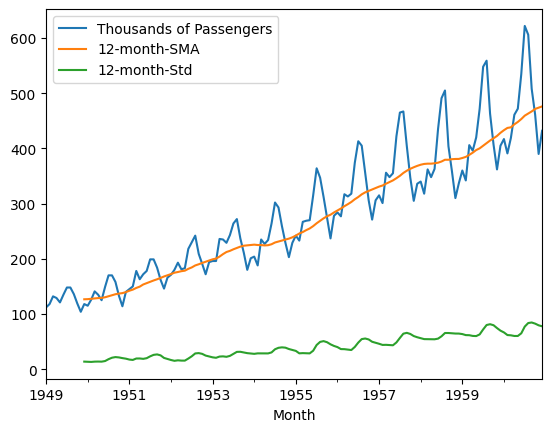

In [6]:
df1.plot()

In [7]:
#dickey fuller test
dftest=adfuller(df1["Thousands of Passengers"],autolag="AIC")
dftest

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [8]:
#airline data DF test
dfout=pd.Series(dftest[0:4],index=["ADF test statistics","p value","# of lags used","observations"])

for key, val in dftest[4].items():
    dfout[f"critical val {key}"]=val
print(dfout)

ADF test statistics      0.815369
p value                  0.991880
# of lags used          13.000000
observations           130.000000
critical val 1%         -3.481682
critical val 5%         -2.884042
critical val 10%        -2.578770
dtype: float64


##### airline data is non stationary data as p value  is high

#### now lets check stationary data

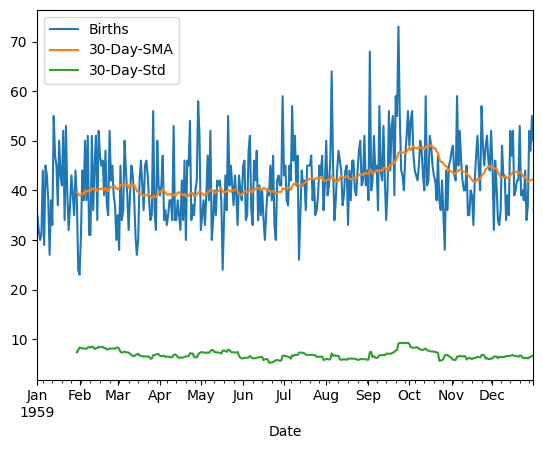

In [9]:
df2['30-Day-SMA'] = df2['Births'].rolling(window=30).mean()
df2['30-Day-Std'] = df2['Births'].rolling(window=30).std()

df2[['Births','30-Day-SMA','30-Day-Std']].plot();

In [10]:
print("Augmented DF Female Births")

dftest=adfuller(df2["Births"],autolag="AIC")
dfout=pd.Series(dftest[0:4],index=["ADF test stat","p-value","# of lags used", "observatons"])

for key,val in dftest[4].items():
    dfout[f"critical value ({key})"]=val

print(dfout)

Augmented DF Female Births
ADF test stat            -4.808291
p-value                   0.000052
# of lags used            6.000000
observatons             358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64


##### p value is lower than the threshold. we reject the null hypotehsis and the data is stationary

# Function to define DF test

In [11]:
from statsmodels.tsa.stattools import  adfuller

def adf_test(series,title=""):

    print(f"Augmented Dickey-Fuller Test: {title}")
    result=adfuller(series.dropna(),autolag="AIC")

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in results[4].items():
        out[f"critical val ({key})"]=val

    print(out.to_string)

    if result[1] <=0.05:
        print("string evidence against the null hypothesis")
        print("reject the null hypothesis")
        print("data is stationary and has no unit root")
    else:
        print("weak evidence against the null hypothesis")
        print("fail to reject the null hypothesis")
        print("data is non-stationary and has a unit root")

### Granger Causality Test

##### this determines if the data is useful for forcasting another data, 
find correlation betweet datas

<AxesSubplot:>

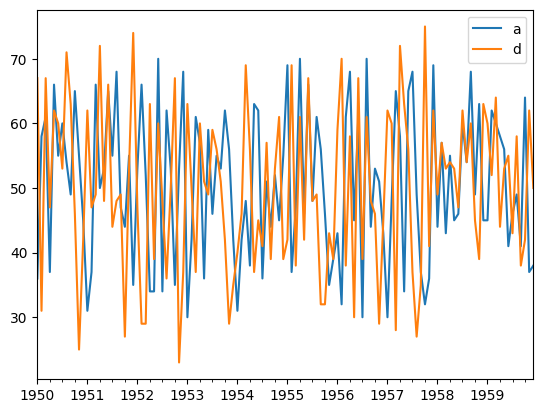

In [12]:
df3=pd.read_csv("./UDEMY_TSA_FINAL/Data/samples.csv",index_col=0,parse_dates=True)
df3.index.freq="MS"
df3[["a","d"]].plot()

<AxesSubplot:>

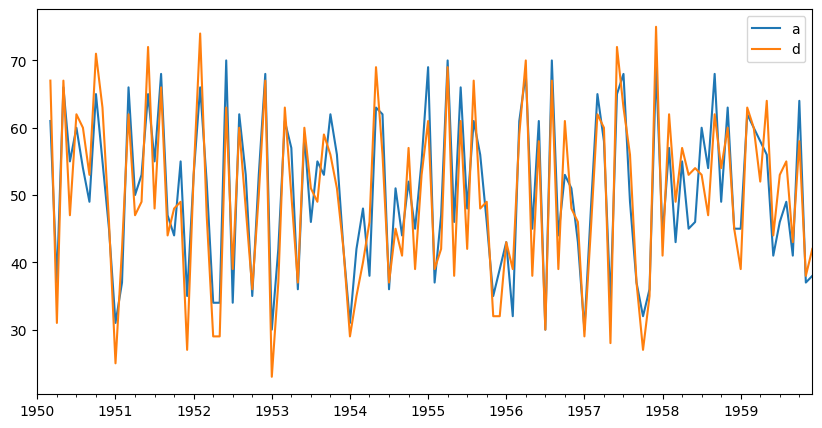

In [13]:
df3["a"].iloc[2:].plot(figsize=(10,5),legend=True)
df3["d"].shift(2).plot(legend=True)

In [14]:
grangercausalitytests(df3[["a","d"]],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [15]:
grangercausalitytests(df3[["b","d"]],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


### forecast accuracy

<AxesSubplot:>

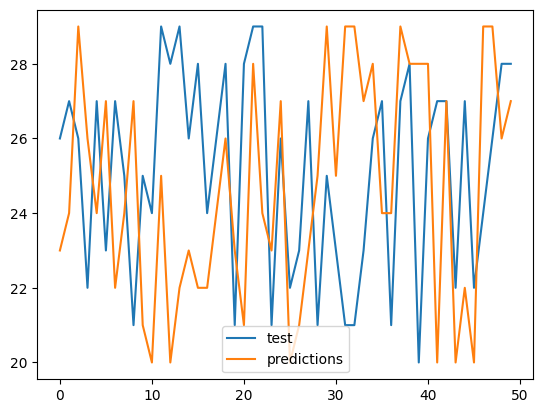

In [16]:
import numpy as np
import pandas as pd

np.random.seed(42)
df=pd.DataFrame(np.random.randint(20,30,(50,2)),columns=["test","predictions"])
df.plot()

In [18]:
MSE=mse(df["test"],df["predictions"])
RMSE=rmse(df["test"],df["predictions"])
MAE=meanabs(df["test"],df["predictions"])

print(f"model MSE: {MSE}")
print(f"model RMSE: {RMSE}")
print(f"model MAE {MAE}")

model MSE: 17.02
model RMSE: 4.125530268947253
model MAE 3.54


## Groupby plots

In [19]:
import pandas as pd 
import numpy as np

df=pd.read_csv("./UDEMY_TSA_FINAL/Data/airline_passengers.csv",index_col="Month",parse_dates=True)
df.index.freq="MS"
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


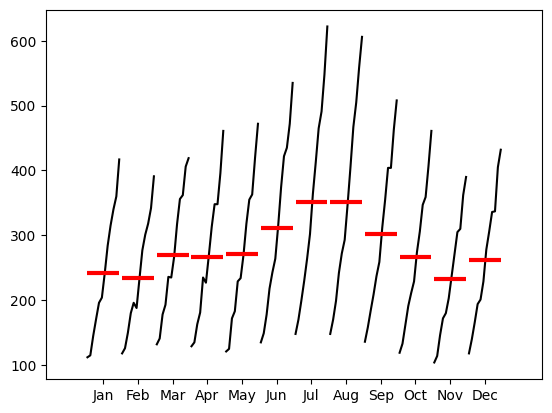

In [21]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

month_plot(df["Thousands of Passengers"]);

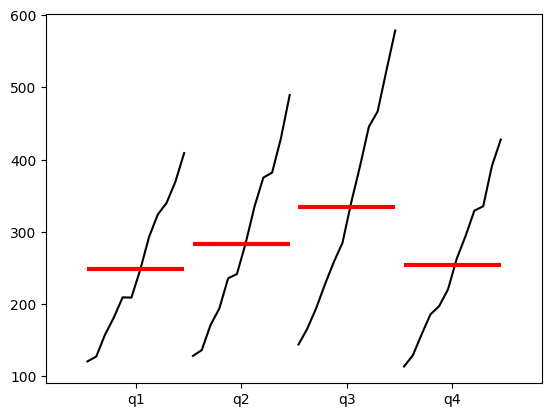

In [22]:
dfq=df["Thousands of Passengers"].resample(rule="Q").mean()
quarter_plot(dfq);

#### macrodata

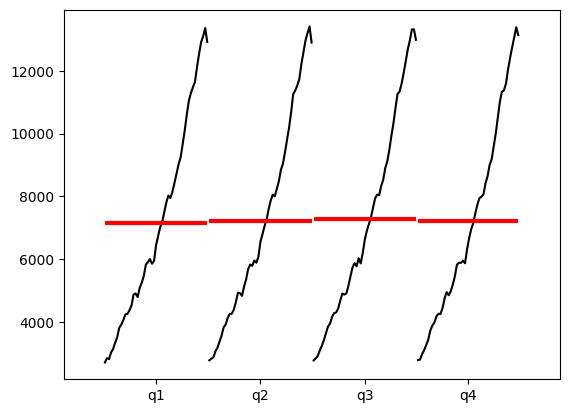

In [26]:
df3=pd.read_csv("./UDEMY_TSA_FINAL/Data/macrodata.csv",index_col=0,parse_dates=True)
quarter_plot(df3["realgdp"]);